In [3]:
import numpy as np
import scipy.special as sc


sc.hyp2f1(1, 1, -2, 1)

inf

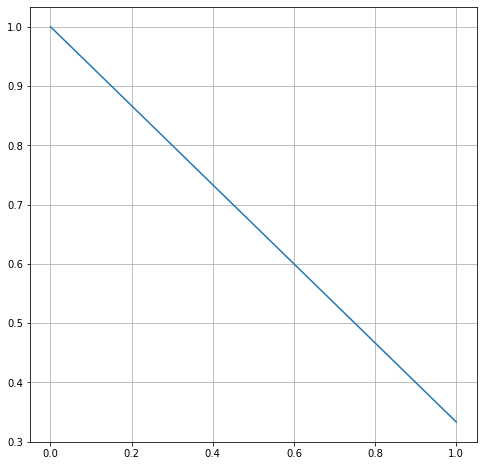

In [9]:
a, b, c = -1, 1, 1.5

#z = np.linspace(0, 1, 1000)

#sc.hyp2f1(a, b, c, z)

import matplotlib.pyplot as plt
%matplotlib inline

a, b, c = -1, 1, 1.5

z = np.linspace(0, 1, 1000)

#sc.hyp2f1(a, b, c, z)

fig,ax = plt.subplots(figsize=[8,8])

ax.plot(z,sc.hyp2f1(a,b,c,z))
ax.grid()

plt.show()

In [ ]:
#scipy.special.hyp2f1(a, b, c, z) 

In [14]:
import scipy.special as sc


def Master_Equation_Solution(L,d,x):
    
    w  = sc.hyp2f1((d-L)/2, 1/2+(d-L)/2, 1+d, x**2)
    v  = sc.hyp2f1((d-L)/2, 1/2+(d-L)/2, 1+d, 1)
    
    return x**d*(w/v)
     

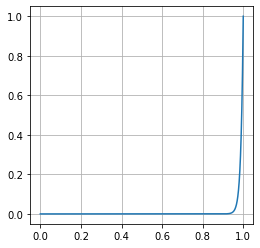

In [16]:
xs = np.linspace(0,1,10000)

ys = Master_Equation_Solution(180,0,xs)

fig,ax = plt.subplots(figsize=[4,4])

ax.plot(xs,ys)
ax.grid()

plt.show()

In [ ]:
def Series_Coefficients(L,d,x):
    
    func = Master_Equation_Solution(L,d,x)

In [5]:
from derivative import dxdt
import numpy as np

t = np.linspace(0,2*np.pi,50)
x = np.sin(t)

# 1. Finite differences with central differencing using 3 points.
result1 = dxdt(x, t, kind="finite_difference", k=1)

# 2. Savitzky-Golay using cubic polynomials to fit in a centered window of length 1
result2 = dxdt(x, t, kind="savitzky_golay", left=.5, right=.5, order=3)

# 3. Spectral derivative
result3 = dxdt(x, t, kind="spectral")

# 4. Spline derivative with smoothing set to 0.01
result4 = dxdt(x, t, kind="spline", s=1e-2)

# 5. Total variational derivative with regularization set to 0.01
result5 = dxdt(x, t, kind="trend_filtered", order=0, alpha=1e-2)

In [32]:
result4

array([ 1.00004691,  0.99177555,  0.96729688,  0.92691443,  0.87131764,
        0.80141235,  0.71834829,  0.62348886,  0.51839179,  0.40478273,
        0.28452716,  0.15959965,  0.03205153, -0.09602288, -0.2225206 ,
       -0.34536453, -0.46253759, -0.5721158 , -0.67229988, -0.76144481,
       -0.83808684, -0.90096751, -0.94905432, -0.98155768, -0.99794389,
       -0.99794389, -0.98155768, -0.94905432, -0.90096751, -0.83808684,
       -0.76144481, -0.67229988, -0.5721158 , -0.46253759, -0.34536453,
       -0.2225206 , -0.09602288,  0.03205153,  0.15959965,  0.28452716,
        0.40478273,  0.51839179,  0.62348886,  0.71834829,  0.80141235,
        0.87131764,  0.92691443,  0.96729688,  0.99177555,  1.00004691])

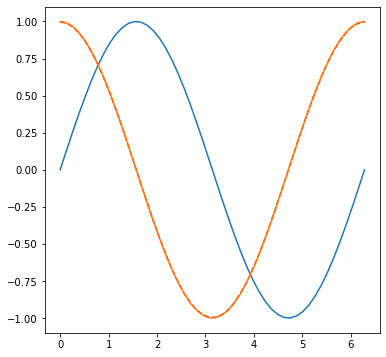

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[6,6])

ax.plot(t,x)
ax.plot(t,result1,linestyle="--",color="red")
#ax.plot(t,result2)
#ax.plot(t,result3)
result4 = dxdt(x, t, kind="spline", s=1e-20)
ax.plot(t,result4)

plt.show()

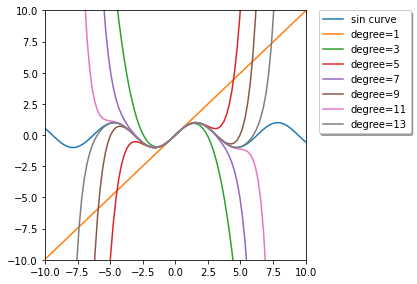

In [34]:
import matplotlib.pyplot as plt

from scipy.interpolate import approximate_taylor_polynomial

x = np.linspace(-10.0, 10.0, num=100)

plt.plot(x, np.sin(x), label="sin curve")

for degree in np.arange(1, 15, step=2):

    sin_taylor = approximate_taylor_polynomial(np.sin, 0, degree, 1,

                                               order=degree + 2)

    plt.plot(x, sin_taylor(x), label=f"degree={degree}")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',

           borderaxespad=0.0, shadow=True)

plt.tight_layout()

plt.axis([-10, 10, -10, 10])

plt.show()